# 1. Generating Fake Data

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [9]:
train_labels = []
train_samples = []

Example Data
- An experimental Drug was tested on individuals from ages 13 to 100 in a clinical trial
- The trial had 2100 participants. Half were under 65 years old, half were above 65
- Around 95% of the participants >= 65 experienced side effects
- around 95% of the participants < 65  experienced no side effects

In [10]:
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [13]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [16]:
train_samples

array([66, 58, 37, ..., 84, 89, 98])

In [20]:
scalar = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scalar.fit_transform(train_samples.reshape(-1,1))

# 2. Simple tf.keras Sequential Model

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [23]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Num GPUs Available: ', len(physical_devices))

Num GPUs Available:  0


In [24]:
# Dense is the first Hidden Layer (FULLY CONNECTED LAYER)
# There is a hidden input layer that is not explicitly specified here
# it is inferred from the input_shape
# First hidden layer has 16 neurons
# Second hidden layer has 32 neurons
# Output layer has 2 neurons (2 possible outputs side effects or not)
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax'),
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# 3. Train Model

In [26]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
# Shuffle gets rid of any order that was present in the train data before being passed on to the model
model.fit(x=scaled_train_samples,
          y=train_labels,
          batch_size=10,
          epochs=30,
          shuffle=True)

Epoch 1/30
210/210 [==============================] - 0s 551us/step - loss: 0.2469 - accuracy: 0.9419
Epoch 2/30
210/210 [==============================] - 0s 544us/step - loss: 0.2465 - accuracy: 0.9419
Epoch 3/30
210/210 [==============================] - 0s 556us/step - loss: 0.2461 - accuracy: 0.9419
Epoch 4/30
210/210 [==============================] - 0s 545us/step - loss: 0.2459 - accuracy: 0.9419
Epoch 5/30
210/210 [==============================] - 0s 545us/step - loss: 0.2454 - accuracy: 0.9419
Epoch 6/30
210/210 [==============================] - 0s 535us/step - loss: 0.2452 - accuracy: 0.9443
Epoch 7/30
210/210 [==============================] - 0s 532us/step - loss: 0.2448 - accuracy: 0.9419
Epoch 8/30
210/210 [==============================] - 0s 569us/step - loss: 0.2446 - accuracy: 0.9419
Epoch 9/30
210/210 [==============================] - 0s 552us/step - loss: 0.2442 - accuracy: 0.9419
Epoch 10/30
210/210 [==============================] - 0s 541us/step - loss: 0.244

# 4. Validation Set

In [30]:
# Split 10% of training set as validation set
# Note validation set is the last 10% of the training set
model.fit(x=scaled_train_samples,
          y=train_labels,
          batch_size=10,
          epochs=30,
          validation_split=0.1,
          shuffle=True)

Epoch 1/30
189/189 [==============================] - 0s 1ms/step - loss: 0.2454 - accuracy: 0.9444 - val_loss: 0.1884 - val_accuracy: 0.9619
Epoch 2/30
189/189 [==============================] - 0s 670us/step - loss: 0.2453 - accuracy: 0.9513 - val_loss: 0.1876 - val_accuracy: 0.9619
Epoch 3/30
189/189 [==============================] - 0s 654us/step - loss: 0.2450 - accuracy: 0.9460 - val_loss: 0.1876 - val_accuracy: 0.9619
Epoch 4/30
189/189 [==============================] - 0s 649us/step - loss: 0.2450 - accuracy: 0.9471 - val_loss: 0.1864 - val_accuracy: 0.9619
Epoch 5/30
189/189 [==============================] - 0s 640us/step - loss: 0.2446 - accuracy: 0.9460 - val_loss: 0.1879 - val_accuracy: 0.9619
Epoch 6/30
189/189 [==============================] - 0s 652us/step - loss: 0.2445 - accuracy: 0.9503 - val_loss: 0.1862 - val_accuracy: 0.9619
Epoch 7/30
189/189 [==============================] - 0s 622us/step - loss: 0.2443 - accuracy: 0.9434 - val_loss: 0.1870 - val_accuracy: 0

# 5. Creating Test Set

In [33]:
test_labels = []
test_samples = []

for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scalar.fit_transform(test_samples.reshape(-1,1))

# 6. Predict

In [34]:
pred = model.predict(x=scaled_test_samples, batch_size=10)

In [35]:
# [No_side_effect (0), have side effect (1)]
print(pred)

[[0.95738006 0.04262   ]
 [0.07714276 0.9228572 ]
 [0.05869924 0.94130075]
 [0.9638545  0.03614544]
 [0.100761   0.89923906]
 [0.0368554  0.9631446 ]
 [0.0106346  0.98936546]
 [0.9601548  0.03984525]
 [0.95878977 0.04121028]
 [0.02294223 0.9770578 ]
 [0.9591351  0.04086489]
 [0.07714276 0.9228572 ]
 [0.9627558  0.03724413]
 [0.04048376 0.9595162 ]
 [0.01894826 0.9810517 ]
 [0.96114993 0.03885002]
 [0.9594777  0.04052226]
 [0.9638545  0.03614544]
 [0.20480862 0.79519135]
 [0.9544094  0.04559061]
 [0.96389496 0.0361051 ]
 [0.09224965 0.9077503 ]
 [0.95975304 0.04024693]
 [0.02775422 0.9722457 ]
 [0.05352941 0.9464706 ]
 [0.95878977 0.04121028]
 [0.9591351  0.04086489]
 [0.2567836  0.74321634]
 [0.95347345 0.04652654]
 [0.05869924 0.94130075]
 [0.45475072 0.5452493 ]
 [0.02775422 0.9722457 ]
 [0.9555465  0.04445355]
 [0.9547915  0.04520854]
 [0.0172154  0.98278457]
 [0.9618001  0.03819985]
 [0.10996244 0.89003754]
 [0.52803516 0.4719649 ]
 [0.383375   0.61662495]
 [0.9594777  0.04052226]


In [36]:
rounded_pred = np.argmax(pred, axis=-1)

In [37]:
rounded_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,

# 7. Confusion matrix

In [38]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [39]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_pred)

In [41]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalisation can be applied by setting 'normalize=True'
    """
    import itertools
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        print('Confusion matrix without normalisation')
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix without normalisation
[[200  10]
 [ 10 200]]


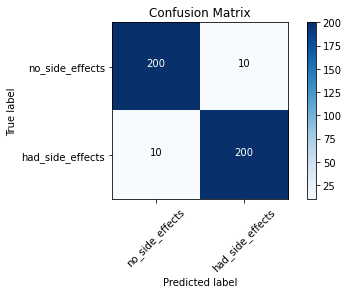

In [42]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels,  title='Confusion Matrix')

# 8. Saving and Loading Keras Model

This save function saves
1. The architecture of the model, allowing to recreate the model
2. the weights of the model
3. the training configuration (loss, optimizer)
4. the state of the optimizer allowing to resume exactly where you left off

### H5 model

In [45]:
import os
model_path = 'models/medical_trial_model.h5'
if os.path.isfile(model_path) is False:
    model.save(model_path)

In [46]:
from tensorflow.keras.models import load_model
new_model = load_model(model_path)

In [48]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [49]:
new_model.get_weights()

[array([[ 0.00395543,  0.6286578 , -0.02848798,  0.1017203 ,  0.34757647,
          0.68520474,  0.39806825, -0.38702235,  0.5097547 , -0.41450876,
          0.39024994, -0.17077419,  0.62670386, -0.06987685,  0.35413685,
         -0.25582993]], dtype=float32),
 array([-0.00499939, -0.2417226 ,  0.        ,  0.19326815, -0.17365158,
        -0.2638279 , -0.19427952,  0.        , -0.2540262 ,  0.        ,
        -0.18568188,  0.        , -0.06440621,  0.        ,  0.17236754,
         0.        ], dtype=float32),
 array([[ 2.71255523e-01, -3.46494198e-01,  9.34202522e-02,
         -2.35256970e-01, -1.17793128e-01,  2.18004510e-01,
          1.68987766e-01,  9.58427265e-02,  1.18798733e-01,
          8.19204152e-02, -1.05442986e-01,  1.58158973e-01,
          1.24290794e-01,  7.06702471e-02, -2.30269626e-01,
          4.13895547e-02, -1.26193032e-01,  1.32751539e-01,
         -6.00056909e-02,  1.66974932e-01,  2.15028942e-01,
         -9.32951644e-02, -1.65538400e-01, -1.42173365e-01,
 

In [50]:
new_model.optimizer

### json
if you only want to save the architecture of a model, and not its weights or its training configuration

In [51]:
# save as Json
json_string = model.to_json()

# save as yaml
#yaml_string = model.to_yaml()\

In [52]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [54]:
# model reconstruction from json\
from tensorflow.keras.models import model_from_json
model_archictecture = model_from_json(json_string)

In [56]:
model_archictecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
